In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Load the Data

In [2]:
def load_data(data_folder):
    root_dir = os.path.join(os.getcwd(), '../waste_data/combine videos/'+data_folder)
    file_name = os.path.join(root_dir, 'all_data.csv')
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            data.append(line.split(','))

    def get_row_labels(col_num):
        # put min max labels in stats
        row_labels = []
        i = 0
        while i <len(data) and data[i][col_num] not in row_labels:
            if data[i][col_num] != '': row_labels.append(data[i][col_num])
            i += 1
        return row_labels

    dists = get_row_labels(0)
    stats = get_row_labels(1)
    data = [line[2:-1] for line in data]
    cams = [entry for entry in data[0] if entry != '']
    objs = [entry.lower() for entry in data[1] if entry != '']
    labels = [entry for entry in data[2] if entry != '']
    num_objs = len(set(objs))
    objs = objs[:num_objs]
    num_labels = len(set(labels))
    labels = labels[:num_labels]
    data = data[3:]

    data_categories = [stats, dists,labels,objs,cams]
    data = np.asarray(data).astype(np.float)
    # create a data tensor with dimension
    # min_max x distance x label x obj x cam_num
    data = np.stack(np.split(data, len(cams), axis=1), axis=0)
    data = np.stack(np.split(data, len(objs), axis=2), axis=0)
    data = np.stack(np.split(data, len(labels), axis=3), axis=0)
    data = np.stack(np.split(data, len(dists), axis=3), axis=0)
    data = np.stack(np.split(data, len(stats), axis=4), axis=0)
    print('stats: ' + str(stats))
    print('distance: ' + str(dists))
    print('labels: ' + str(labels))
    print('objs: ' + str(objs))
    print('cams: ' + str(cams))
    print('Shape corresponds to:  (stats , distance , label , obj , cam_num, 1, 1)')
    print(data.shape)
    return data, data_categories

data_folder = 'sonali videos'
data,data_categories = load_data(data_folder)
save_dir = os.path.join(os.getcwd(), data_folder)
try:
    os.mkdir(save_dir)
except:
    pass

stats: ['mean', 'max']
distance: ['3', '5', '10', '15']
labels: ["'cup'", " 'bottle'", " 'person'"]
objs: ['coke_can', 'gatorade_bottle', 'water_bottle', 'sprite_can', 'mountaindew_bottle']
cams: ['cam_0', 'cam_1', 'cam_2']
Shape corresponds to:  (stats , distance , label , obj , cam_num, 1, 1)
(2, 4, 3, 5, 3, 1, 1)


Object vs Average Mean Confidence Probability
[('coke_can', 0.3435916343220959), ('gatorade_bottle', 0.3630267490943273), ('water_bottle', 0.34644076821428754), ('sprite_can', 0.345773845428118), ('mountaindew_bottle', 0.38853909509877366)]


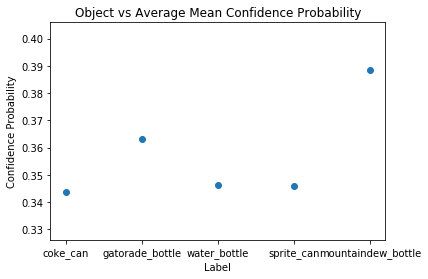

Object vs Average Max Confidence Probability
[('coke_can', 0.5080422593487633), ('gatorade_bottle', 0.4784556080897649), ('water_bottle', 0.5368728985389074), ('sprite_can', 0.46434662905004287), ('mountaindew_bottle', 0.6178759137789408)]


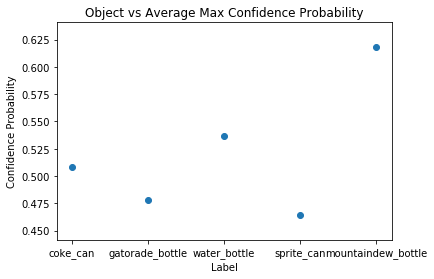

In [3]:
title = "Object vs Average Mean Confidence Probability"
print(title)
category_num = 3 #obj
avg_prob = data[0] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel('Label')
plt.ylabel('Confidence Probability')
plt.scatter(data_categories[category_num], avg_prob)
plt.savefig(os.path.join(save_dir, title+'.png'))

plt.show()

title = "Object vs Average Max Confidence Probability"
print(title)
avg_prob = data[1] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel('Label')
plt.ylabel('Confidence Probability')
plt.scatter(data_categories[category_num], avg_prob)
plt.savefig(os.path.join(save_dir, title+'.png'))

plt.show()

Distance vs Average Mean Confidence Probability
[('3', 0.3704255500877345), ('5', 0.39045019314244944), ('10', 0.3393469990182806), ('15', 0.3296749314776174)]


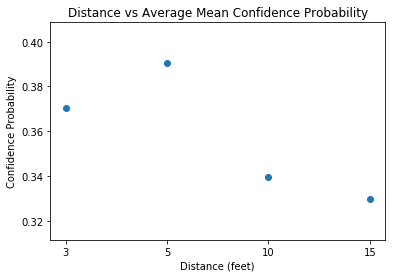

Distance vs Average Max Confidence Probability
[('3', 0.653052380349901), ('5', 0.6078002836969164), ('10', 0.4526899496714274), ('15', 0.37093203332689073)]


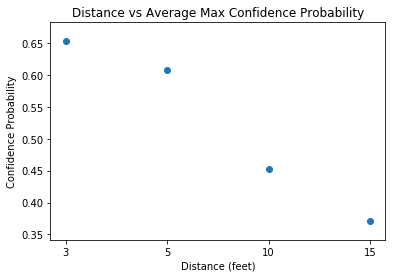

In [4]:
title = "Distance vs Average Mean Confidence Probability"
print(title)
category_num = 1 #distance
avg_prob = data[0] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel('Distance (feet)')
plt.ylabel('Confidence Probability')
plt.scatter(data_categories[category_num], avg_prob)
plt.savefig(os.path.join(save_dir, title+'.png'))

plt.show()

title = "Distance vs Average Max Confidence Probability"
print(title)
category_num = 1 #distance
avg_prob = data[1] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel('Distance (feet)')
plt.ylabel('Confidence Probability')
plt.scatter(data_categories[category_num], avg_prob)
plt.savefig(os.path.join(save_dir, title+'.png'))

plt.show()

Camera Height vs Average Mean Confidence Probability
[(8, 0.37802576464083454), (3, 0.3600772469656335), (5, 0.33432024368809327)]


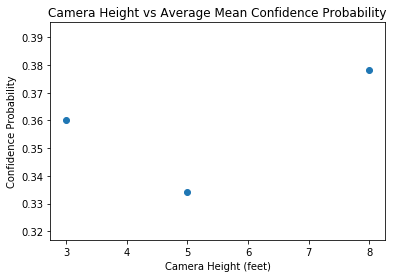

Camera Height vs Average Max Confidence Probability
[(8, 0.5508803884188335), (3, 0.6312934497992198), (5, 0.38118214706579845)]


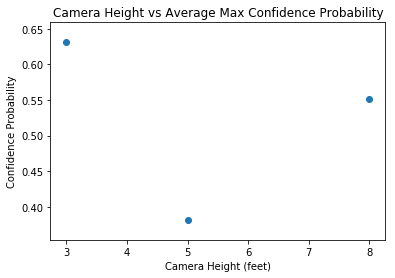

In [5]:
title = "Camera Height vs Average Mean Confidence Probability"
print(title)
category_num = 4 # camera num
avg_prob = data[0] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
rename_x = [8, 3, 5] #rename the x axis
for i in range(len(data_categories[category_num])): data_categories[category_num][i] = rename_x[i]
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel('Camera Height (feet)')
plt.ylabel('Confidence Probability')
plt.scatter(data_categories[category_num], avg_prob)
plt.savefig(os.path.join(save_dir, title+'.png'))

plt.show()

title = "Camera Height vs Average Max Confidence Probability"
print(title)
category_num = 4 #camera num
avg_prob = data[1] # 0 - mean, 1 - max
avg_prob = np.mean(avg_prob, axis=tuple([i for i in range(avg_prob.ndim) if i != category_num - 1]))
print(list(zip(data_categories[category_num], avg_prob)))
plt.title(title)
plt.xlabel('Camera Height (feet)')
plt.ylabel('Confidence Probability')
plt.scatter(data_categories[category_num], avg_prob)
plt.savefig(os.path.join(save_dir, title+'.png'))

plt.show()